In [ ]:
# !pip install tensorflow_decision_forests

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_decision_forests as tfdf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = sns.load_dataset('iris')

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns.difference(['species'])

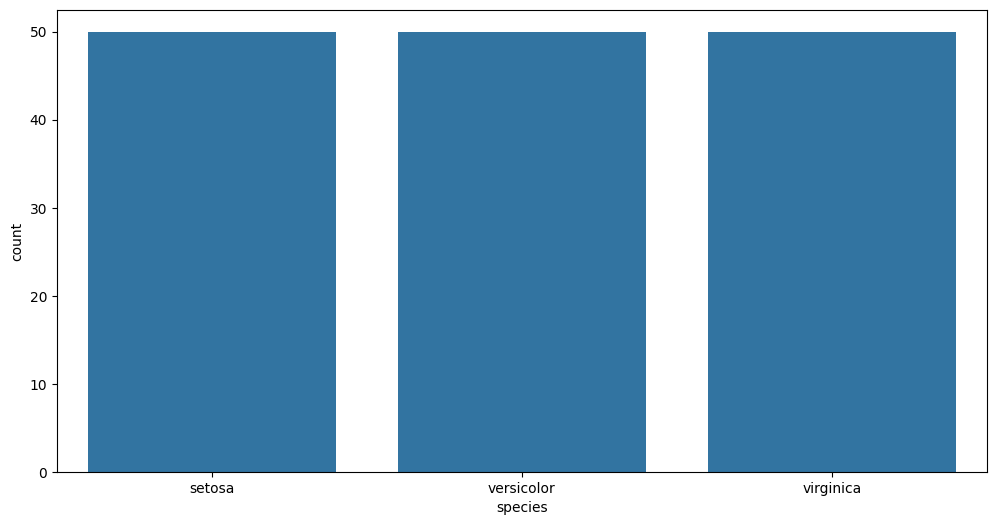

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data, x='species')
plt.show()

In [ ]:
data.species.value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


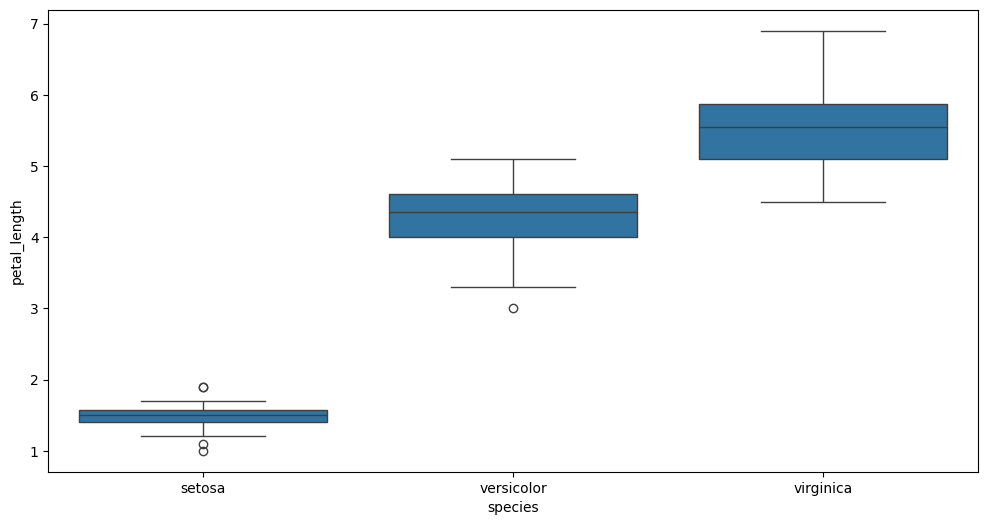

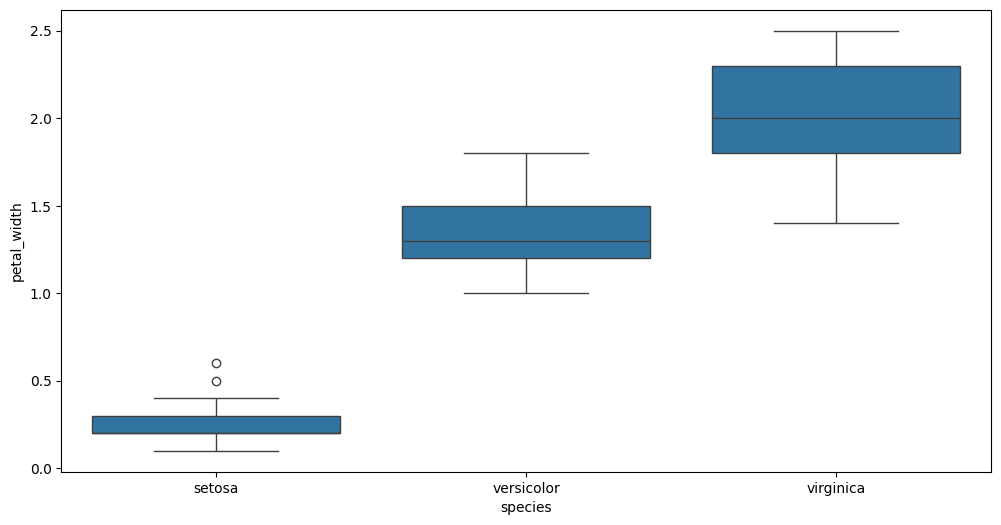

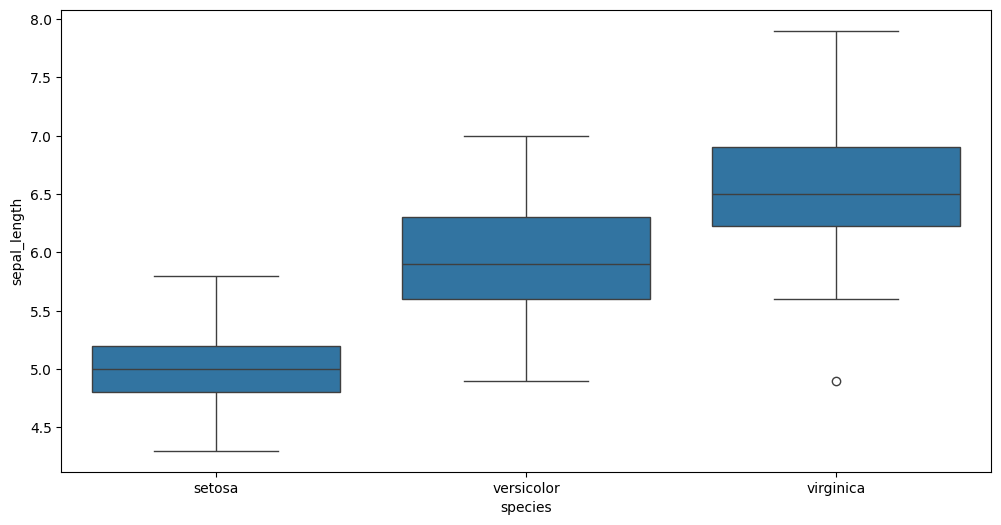

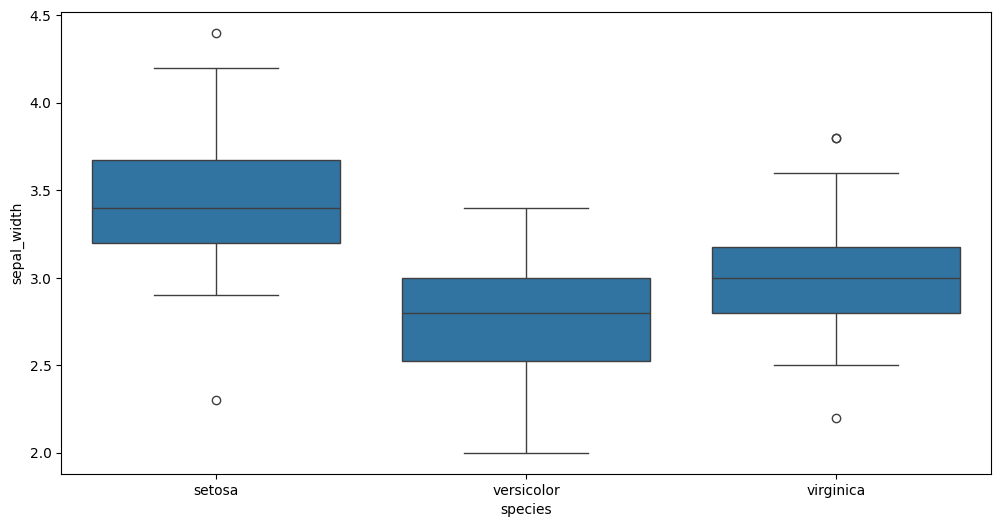

In [ ]:
for feature in numerical_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data, x='species', y=feature)
    plt.show()

In [ ]:
# Create label encoder

species_encoder = LabelEncoder()

# Fit and transform the 'species' column
data['species'] = species_encoder.fit_transform(data['species'])

species_mapping = dict(zip(species_encoder.classes_, range(len(species_encoder.classes_))))

In [ ]:
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_data, label="species")
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_data, label="species")

model = tfdf.keras.RandomForestModel()
model.fit(train_ds, verbose=3)

Use /tmp/tmpyqesptmm as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'sepal_length': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'sepal_width': <tf.Tensor 'data_1:0' shape=(None,) dtype=float64>, 'petal_length': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'petal_width': <tf.Tensor 'data_3:0' shape=(None,) dtype=float64>}
Label: Tensor("data_4:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'sepal_length': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'sepal_width': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'petal_length': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(None,) dtype=float32>), 'petal_width': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_3:0' shape=(None,) dtype=float32>)}


Training dataset read in 0:00:00.641471. Found 105 examples.
Training model...


2025-01-15 12:11:29.929894: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1206] Loading model from path /tmp/tmpyqesptmm/model/ with prefix 40145e80971f40c2
I0000 00:00:1736943089.938201    1902 decision_forest.cc:761] Model loaded with 300 root(s), 2844 node(s), and 4 input feature(s).
I0000 00:00:1736943089.938255    1902 abstract_model.cc:1404] Engine "RandomForestGeneric" built
2025-01-15 12:11:29.938275: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1035] Use fast generic engine


Model trained in 0:00:00.050564
Compiling model...


Model compiled.


In [ ]:
# get an inspector to access model internals
inspector = model.make_inspector()

# Display feature importances
importance_types = inspector.variable_importances().keys()


for importance_type in importance_types:
  print('\n'+ '=' * 30)
  print(f'Importance type: {importance_type}')
  print("-" * 30)
  importances = inspector.variable_importances()[importance_type]
  sorted_importances = sorted(importances, key=lambda x: x[1], reverse=True)
  for feature, importance in sorted_importances:
    feature_name = feature.name if isinstance(feature, tfdf.py_tree.dataspec.SimpleColumnSpec) else str(feature)
    print(f'{feature_name:20}: {importance:.4f}')

print('\n' + "=" * 30)


Importance type: INV_MEAN_MIN_DEPTH
------------------------------
petal_width         : 0.5720
petal_length        : 0.5268
sepal_length        : 0.2792
sepal_width         : 0.2764

Importance type: SUM_SCORE
------------------------------
petal_width         : 16676.4185
petal_length        : 15020.9051
sepal_length        : 298.4109
sepal_width         : 274.9627

Importance type: NUM_AS_ROOT
------------------------------
petal_width         : 164.0000
petal_length        : 136.0000

Importance type: NUM_NODES
------------------------------
petal_length        : 549.0000
petal_width         : 517.0000
sepal_length        : 126.0000
sepal_width         : 80.0000



In [ ]:
test_predictions = model.predict(test_ds)
predicted_labels = np.argmax(test_predictions, axis=1)

test_labels = test_data['species'].values

# compute accuracy
accuracy = accuracy_score(test_labels, predicted_labels)
print(f'Accuracy: {accuracy:.4f}')

# compute confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)
print('Confusion Matrix:')
print(cm)

# compute classification report
species_names = species_encoder.classes_
report = classification_report(test_labels, predicted_labels, target_names=species_names)
print('Classification Report:')
print(report)

1/1 [==============================] - 0s 158ms/step
Accuracy: 1.0000
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

